In [1]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)
import pandas as pd
import scipy.signal as ss
import sys

import tools.data_reader_apd as dr
import tools.display_tools as dt
import tools.preprocessing as preprocessing

import cvxopt.solvers
cvxopt.solvers.options['show_progress'] = False


In [ ]:
#LOAD ECG DATA
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
task = dr.Tasks.BASELINE
data_type = dr.DataTypes.ECG
phase = dr.Phases.BASE_REST
fs = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

ha_ecg, la_ecg = preprocessing.load_data(task, data_type, phase, convert_sr)
# ha_ecg_freq = preprocessing.calculate_fft_data(ha_ecg, freq)
# la_ecg_freq = preprocessing.calculate_fft_data(la_ecg, freq)

In [ ]:
#LOAD WRIST DATA
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
task = dr.Tasks.BASELINE
data_type = dr.DataTypes.WRIST_L
phase = dr.Phases.BASE_REST
fs = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

ha_wr, la_wr = preprocessing.load_data(task, data_type, phase, convert_sr)

In [ ]:
# CALCULATE ECG METRICS
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
task = dr.Tasks.SPEAKING
data_type = dr.DataTypes.ECG
phase = dr.Phases.SPEECH_EXPOSURE

fs = preprocessing.FS_DICT[data_type]
n_dim = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

x, ha_ecg_mean = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="mean")
x, la_ecg_mean = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="mean")
x, ha_ecg_med = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="median")
x, la_ecg_med = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="median")
x, ha_ecg_fft = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="fft")
x, la_ecg_fft = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="fft")

In [ ]:
# COMPARE HA AND LA ECG METRICS
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

colors = [
    '#1F77B4', '#9467BD', '#8C564A', 
    '#7F7F7F', '#1FBECF', '#E377C2', '#BCBD27'
]

convert_sr = False

# for data_type in [dr.DataTypes.ECG, dr.DataTypes.EDA]:
for data_type in [dr.DataTypes.EDA]:
    for task in [dr.Tasks.BASELINE, dr.Tasks.BUGS, dr.Tasks.SPEAKING]:

        if task == dr.Tasks.BASELINE:
            phases = [
                dr.Phases.BASE_REST, dr.Phases.BASE_SPEECH
            ]
        elif task == dr.Tasks.BUGS:
            phases = [
                dr.Phases.BUG_RELAX, dr.Phases.BUG_INSTRUCTIONS, dr.Phases.BUG_ANTICIPATE,
                dr.Phases.BUG_DECISION, dr.Phases.BUG_EXPOSURE, dr.Phases.BUG_BREAK, dr.Phases.BUG_REFLECT
            ]
        else:
            phases = [
                dr.Phases.SPEECH_RELAX, dr.Phases.SPEECH_INSTRUCTIONS, dr.Phases.SPEECH_ANTICIPATE,
                dr.Phases.SPEECH_DECISION, dr.Phases.SPEECH_EXPOSURE, dr.Phases.SPEECH_BREAK, dr.Phases.SPEECH_REFLECT
            ]

        for phase in phases:
            fs = preprocessing.FS_DICT[data_type]
            n_dim = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

            # MEAN
            try:
                x, data_1 = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="mean")
                x, data_2 = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="mean")
            except Exception as e:
                print(f"ERROR IN {phase}")
                raise e
                
            min_len = min(x.size, data_1.size, data_2.size)
            x = x[0:min_len]
            data_1 = data_1[0:min_len]
            data_2 = data_2[0:min_len]
            y1 = data_1.flatten()
            y2 = data_2.flatten()

            title = f"HA, LA ECG {phase} Mean"
            plt.figure(figsize=(17,7))

            plt.plot(x, y1, label="HA", color=colors[0], linewidth=1)
            plt.plot(x, y2, label="LA", color=colors[4], linewidth=1)
            plt.xlabel("Timestep")
            plt.ylabel(f"{data_type} {phase}")
            plt.legend(loc="upper right")
            plt.title(title)

            y_min = np.min([y1, y2])
            y_max = np.max([y1, y2])
            y_med = np.median([y_min, y_max])
            num_ticks = 20
            plt.ylim(y_min-(y_med-y_min)/5, y_max+(y_max-y_med)/5)
            plt.tight_layout()


            # MEDIAN
            x, data_1 = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="median")
            x, data_2 = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="median")
            min_len = min(x.size, data_1.size, data_2.size)
            x = x[0:min_len]
            data_1 = data_1[0:min_len]
            data_2 = data_2[0:min_len]
            y1 = data_1.flatten()
            y2 = data_2.flatten()

            title = f"HA, LA ECG {phase} Median"
            plt.figure(figsize=(17,7))

            plt.plot(x, y1, label="HA", color=colors[0], linewidth=1)
            plt.plot(x, y2, label="LA", color=colors[4], linewidth=1)
            plt.xlabel("Timestep")
            plt.ylabel(f"{data_type} {phase}")
            plt.legend(loc="upper right")
            plt.title(title)

            y_min = np.min([y1, y2])
            y_max = np.max([y1, y2])
            y_med = np.median([y_min, y_max])
            plt.ylim(y_min-(y_med-y_min)/5, y_max+(y_max-y_med)/5)
            plt.tight_layout()


In [ ]:
# COMPARE HA AND LA ECG FFT
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
task = dr.Tasks.BASELINE
data_type = dr.DataTypes.WRIST_L
phase = dr.Phases.BASE_REST

colors = [
    '#1F77B4', '#9467BD', '#8C564A', 
    '#7F7F7F', '#1FBECF', '#E377C2', '#BCBD27'
]


# ha_ecg_fft = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="fft mean")
# la_ecg_fft = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="fft mean")
x, ha_ecg_fft = preprocessing.calculate_group_metric("HA", task, data_type, phase, metric="fft")
x, la_ecg_fft = preprocessing.calculate_group_metric("LA", task, data_type, phase, metric="fft")


data_1 = np.take(ha_ecg_fft, indices=[0], axis=-1)  # fft
# data_1 = np.take(ha_ecg_fft, indices=np.arange(0, ha_ecg_fft.shape[-1], 1), axis=-1)  # fft mean
data_2 = np.take(la_ecg_fft, indices=[0], axis=-1)  # fft
# data_2 = np.take(la_ecg_fft, indices=np.arange(0, ha_ecg_fft.shape[-1], 1), axis=-1)  # fft mean

min_len = min(data_1.shape[0], data_2.shape[0])
data_1 = data_1[0:min_len, :]
data_2 = data_2[0:min_len, :]
title = f"HA, LA ECG {phase} FT"

x = x.flatten()
x = np.absolute(x)
y1 = np.abs(data_1[:, 1]).flatten()
y2 = np.abs(data_2[:, 1]).flatten()

freq_range = [0, x[-1]]
print(freq_range)

plt.figure(figsize=(17, 7))
plt.stem(x, y1, label="HA", linefmt=f"C0-", markerfmt=".")
plt.stem(x, y2, label="LA", linefmt=f"C1-", markerfmt=".")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude")
plt.legend(loc="upper right")
plt.title(title)

y_min = np.min([y1, y2])
y_max = np.max([y1, y2])
y_med = np.median([y_min, y_max])
plt.xlim(freq_range[0], freq_range[1])
plt.ylim(0, y_max+(y_max-y_med)/5)
plt.tight_layout()


In [ ]:
# COMPARE HA AND LA SCR
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

import random

convert_sr = False
task = dr.Tasks.BUGS
data_type = dr.DataTypes.EDA
phases = [dr.Phases.BUG_RELAX, dr.Phases.BUG_ANTICIPATE, dr.Phases.BUG_EXPOSURE, dr.Phases.BUG_BREAK, dr.Phases.BUG_REFLECT]


for phase in phases:
    ha_eda, la_eda = preprocessing.load_data(task, data_type, phase, convert_sr)
    index = random.choice(range(len(ha_eda)))
    
    data_ha = ha_eda[index].flatten()
    data_la = la_eda[index].flatten()

    while data_ha.size == 0 or data_la.size == 0:
        index = random.choice(range(len(ha_eda)))
        data_ha = ha_eda[index].flatten() 
        data_la = la_eda[index].flatten()

    scr_ha, scl_ha = preprocessing.get_SC_metrics(data_ha)
    scr_la, scl_la = preprocessing.get_SC_metrics(data_la)

    x_ha = np.arange(0, scr_ha.shape[0], 1)
    x_la = np.arange(0, scr_la.shape[0], 1)

    # plt.figure()
    # plt.plot(x_ha, data_ha)
    # plt.title(f"EDA HA at index {index} for phase {phase}")

    # plt.figure()
    # plt.plot(x_ha, scr_ha)
    # plt.title(f"SCR HA at index {index} for phase {phase}")

    # plt.figure()
    # plt.plot(x_ha, scl_ha)
    # plt.title(f"SCL HA at index {index} for phase {phase}")

    # plt.figure()
    # plt.plot(x_la, data_la)
    # plt.title(f"EDA LA at index {index} for phase {phase}")

    # plt.figure()
    # plt.plot(x_la, scr_la)
    # plt.title(f"SCR LA at index {index} for phase {phase}")

    # plt.figure()
    # plt.plot(x_la, scl_la)
    # plt.title(f"SCL LA at index {index} for phase {phase}")


Duration of phase for HA: 189.46 s
Duration of phase for LA: 189.46 s
Duration of phase for HA: 189.38 s
Duration of phase for LA: 189.54 s
Duration of phase for HA: 189.62 s
Duration of phase for LA: 189.7 s
Duration of phase for HA: 189.22 s
Duration of phase for LA: 189.38 s


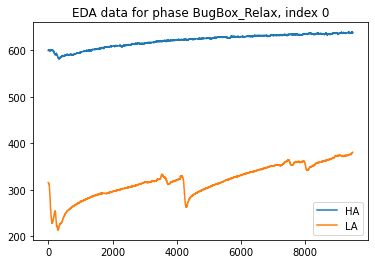

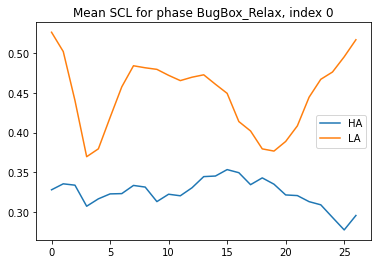

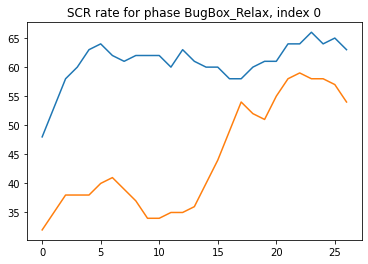

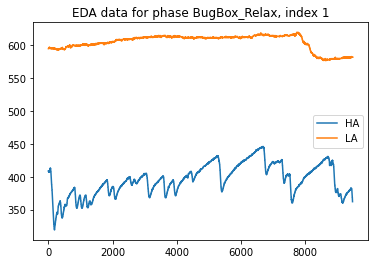

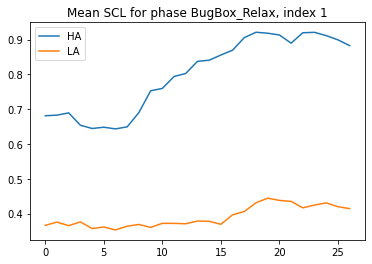

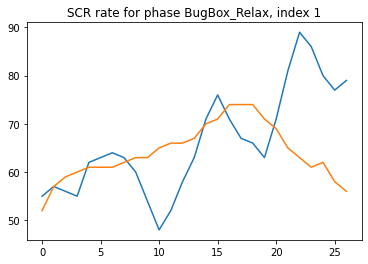

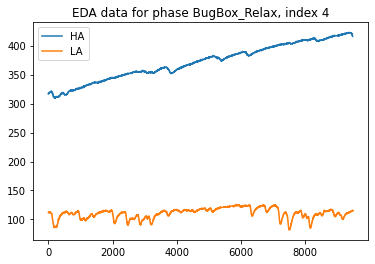

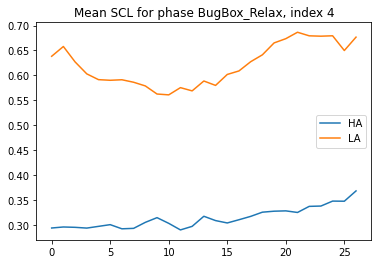

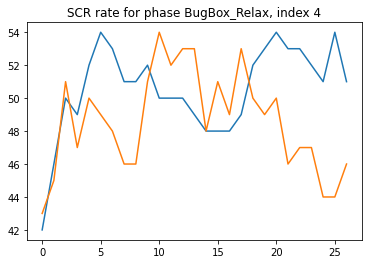

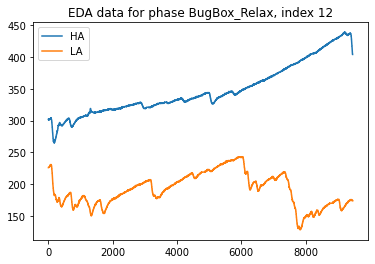

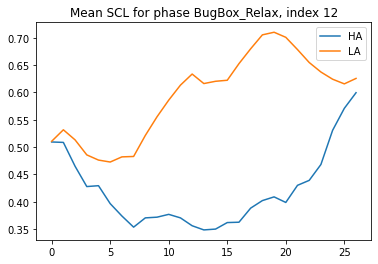

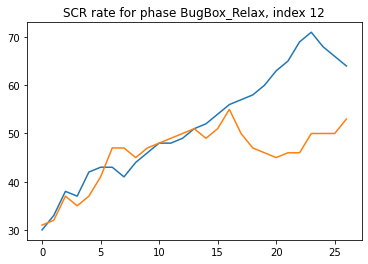

In [28]:
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

import random

convert_sr = False
task = dr.Tasks.BUGS
data_type = dr.DataTypes.EDA
phases = [dr.Phases.BUG_RELAX, dr.Phases.BUG_ANTICIPATE, dr.Phases.BUG_EXPOSURE, dr.Phases.BUG_BREAK, dr.Phases.BUG_REFLECT]
phase = phases[0]


ha_eda, la_eda = preprocessing.load_data(task, data_type, phase, convert_sr)
for index in [0, 1, 4, 12]:
    data_ha = ha_eda[index]
    data_la = la_eda[index]
    print(f"Duration of phase for HA: {data_ha.shape[0]/preprocessing.FS_DICT[data_type]} s")
    print(f"Duration of phase for LA: {data_la.shape[0]/preprocessing.FS_DICT[data_type]} s")

    mean_scl_ha = preprocessing.get_mean_SCL(data_ha)
    scr_rate_ha = preprocessing.get_SCR_rate(data_ha)
    mean_scl_la = preprocessing.get_mean_SCL(data_la)
    scr_rate_la = preprocessing.get_SCR_rate(data_la)
    # print(f"Mean SCL shape: {mean_scl.shape}")
    # print(f"SCR rate shape: {scr_rate.shape}")

    x_ha = np.arange(0, data_ha.shape[0], 1)
    x_scl_ha = np.arange(0, mean_scl_ha.shape[0], 1)
    x_scr_ha = np.arange(0, scr_rate_ha.shape[0], 1)
    x_la = np.arange(0, data_la.shape[0], 1)
    x_scl_la = np.arange(0, mean_scl_la.shape[0], 1)
    x_scr_la = np.arange(0, scr_rate_la.shape[0], 1)

    plt.figure()
    plt.plot(x_ha, data_ha)
    plt.plot(x_la, data_la)
    plt.legend(["HA", "LA"])
    plt.title(f"EDA data for phase {phase}, index {index}")

    plt.figure()
    plt.plot(x_scl_ha, mean_scl_ha)
    plt.plot(x_scl_la, mean_scl_la)
    plt.legend(["HA", "LA"])
    plt.title(f"Mean SCL for phase {phase}, index {index}")

    plt.figure()
    plt.plot(x_scr_ha, scr_rate_ha)
    plt.plot(x_scr_la, scr_rate_la)
    plt.title(f"SCR rate for phase {phase}, index {index}")
